In [55]:
import sys
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd
from pyproj import Transformer
from scripts.utils import split_column_at
from scripts.accent_cleaner import AccentCleaner
#from deep_translator import GoogleTranslator

In [56]:
df = pd.read_csv("../data/end_product_data//pueblos_recommender.csv")

In [57]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', 'towns_in_vicinity', 'total_population',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses',
       'count_of_stations', 'suburban_train', '0-17', '18-24', '25-34',
       '35-54', '55+', 'male', 'female', '0-17_pct', '18-24_pct', '25-34_pct',
       '35-54_pct', '55+_pct', 'score_connectivity', 'score_economy',
       'score_area_economy', 'score_hospital_distance', 'score_area_hospital',
       'score_school_distance', 'score_area_school', 'score_transport',
       'score_age', 'category_connectivity', 'category_town_size',
       'category_economy', 'cagetory_town_age', 'category_transport', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'cluster', 'enc_scaled__

In [58]:
df

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,towns_in_vicinity,total_population,nearest_airport,...,enc_scaled__total_population,enc_scaled__score_age,enc_scaled__score_transport,enc_scaled__score_school_distance,enc_scaled__score_area_school,enc_scaled__score_area_hospital,enc_scaled__score_hospital_distance,enc_scaled__score_area_economy,enc_scaled__score_economy,enc_scaled__score_connectivity
0,15061,Ortigueira,A Coruña,Galicia,12.53020,-7.851941,43.68634,"(15015, 15022, 15025, 15035, 15036, 15049, 150...",5448,Aeropuerto de A Coruña,...,3.557181,-0.473490,5.792635,0.719746,0.719746,-0.892572,-0.892572,4.173109,4.173109,-0.613597
1,27025,Xove,Lugo,Galicia,61.07624,-7.512421,43.68557,"(15025, 15061, 15070, 15081, 27001, 27002, 270...",3298,Aeropuerto de A Coruña,...,1.865195,0.672636,2.815405,0.719746,0.719746,1.043140,1.043140,0.416032,0.416032,0.820793
2,27013,Cervo,Lugo,Galicia,59.01057,-7.447690,43.68209,"(15061, 27001, 27002, 27005, 27019, 27025, 270...",4182,Aeropuerto de A Coruña,...,2.560877,0.136504,2.739097,0.719746,0.719746,1.817426,1.817426,0.652079,0.652079,0.544010
3,15025,Cerdido,A Coruña,Galicia,127.01170,-7.994961,43.62384,"(15004, 15008, 15015, 15022, 15035, 15036, 150...",1003,Aeropuerto de A Coruña,...,0.059098,-0.410759,3.798159,0.719746,0.719746,-0.118287,-0.118287,0.071797,0.071797,-1.261597
4,33070,Tapia de Casariego,Asturias,Asturias,25.45387,-6.943604,43.56975,"(27002, 27005, 27019, 27027, 27030, 27048, 270...",3571,Aeropuerto de Asturias,...,2.080038,-0.029549,2.550249,0.719746,0.719746,0.268855,0.268855,1.271701,1.271701,0.778462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,11025,Paterna de Rivera,Cádiz,Andalucía,125.97050,-5.866053,36.52333,"(11001, 11003, 11006, 11007, 11010, 11012, 110...",5516,Aeropuerto de Jerez,...,3.610695,1.572655,0.327924,0.719746,0.719746,-0.505430,-0.505430,1.950336,1.950336,1.024311
6820,29056,Gaucín,Málaga,Andalucía,609.39610,-5.317524,36.51830,"(11001, 11003, 11009, 11011, 11013, 11018, 110...",1592,Helipuerto de Algeciras,...,0.522624,0.596693,-1.010917,0.719746,0.719746,0.268855,0.268855,0.337350,0.337350,0.571688
6821,11001,Alcalá de los Gazules,Cádiz,Andalucía,158.39630,-5.723718,36.46045,"(11003, 11006, 11007, 11008, 11009, 11010, 110...",5231,Aeropuerto de Jerez,...,3.386409,1.345018,-0.159224,0.719746,0.719746,-0.892572,-0.892572,2.294571,2.294571,0.545638
6822,11013,Castellar de la Frontera,Cádiz,Andalucía,30.78278,-5.419937,36.28621,"(11001, 11004, 11008, 11021, 11022, 11033, 110...",2990,Helipuerto de Algeciras,...,1.622808,1.366077,-0.842902,0.719746,0.719746,1.817426,1.817426,0.337350,0.337350,1.079668


In [59]:
# fig = px.scatter_mapbox(df_waterfront,

#                         size=‘price’,
#                         color=‘price’,
#                         color_continuous_scale=px.colors.carto.Sunsetdark,
#                         zoom=9.5
#                         )
# fig.update_geos(fitbounds=“locations”)
# fig.update_layout(height=1000, width=1000)
# fig.update_layout(mapbox_style=“open-street-map”)
# fig.update_layout(margin={“r”:50,“t”:50,“l”:50,“b”:50})
# fig.update_layout(
#     coloraxis_colorbar=dict(title=‘Price (USD)’)
# )
# fig.update_layout(title=“Waterfront Properties in King County”)
# fig.show()

In [60]:
px.colors.qualitative.__dict__.keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__file__', '__cached__', '__builtins__', '_swatches', 'swatches', 'Plotly', 'D3', 'G10', 'T10', 'Alphabet', 'Dark24', 'Light24', 'Alphabet_r', 'D3_r', 'Dark24_r', 'G10_r', 'Light24_r', 'Plotly_r', 'T10_r', 'Set1', 'Pastel1', 'Dark2', 'Set2', 'Pastel2', 'Set3', 'Set1_r', 'Pastel1_r', 'Dark2_r', 'Set2_r', 'Pastel2_r', 'Set3_r', 'Antique', 'Bold', 'Pastel', 'Prism', 'Safe', 'Vivid', 'Antique_r', 'Bold_r', 'Pastel_r', 'Prism_r', 'Safe_r', 'Vivid_r', '__all__'])

In [68]:

color_map = {cluster: px.colors.qualitative.Bold[i % len(px.colors.qualitative.Bold)] for i, cluster in enumerate(unique_clusters)}

size = df["total_population"]*20

df["cluster"] = df["cluster"].astype(str)

unique_clusters = df["cluster"].unique()

# Create the scatter map
fig = px.scatter_map(df, 
                        lat="latitude", 
                        lon="longitude",
                        hover_data=["municipality", "altitude"], 
                        size = "20",
                        color="cluster",
                        zoom=5.5,
                        color_discrete_map=color_map # Use updated color mapping
                       )

# Adjust marker size to improve visibility
fig.update_traces(marker=dict(sizeref=1000))

# Fit bounds to locations
fig.update_geos(fitbounds="locations")

# Set map layout
fig.update_layout(
    height=700, 
    width=1500, 
    mapbox_style="carto-positron",
    margin=dict(r=50, t=50, l=50, b=50),
    title="Clusters of Towns in Map"
)

# Show the plot
fig.show()


ValueError: Value of 'size' is not the name of a column in 'data_frame'. Expected one of ['cmun', 'municipality', 'province', 'autonomous_community', 'altitude', 'longitude', 'latitude', 'towns_in_vicinity', 'total_population', 'nearest_airport', 'closest_distance_airport', 'nearest_train_station', 'closest_distance_train', 'closest_distance_hospital', 'nearest_hospital', 'closest_distance_school', 'nearest_school', 'koppen_climate', 'description', 'number_of_houses', 'count_of_stations', 'suburban_train', '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female', '0-17_pct', '18-24_pct', '25-34_pct', '35-54_pct', '55+_pct', 'score_connectivity', 'score_economy', 'score_area_economy', 'score_hospital_distance', 'score_area_hospital', 'score_school_distance', 'score_area_school', 'score_transport', 'score_age', 'category_connectivity', 'category_town_size', 'category_economy', 'cagetory_town_age', 'category_transport', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'cluster', 'enc_scaled__total_population', 'enc_scaled__score_age', 'enc_scaled__score_transport', 'enc_scaled__score_school_distance', 'enc_scaled__score_area_school', 'enc_scaled__score_area_hospital', 'enc_scaled__score_hospital_distance', 'enc_scaled__score_area_economy', 'enc_scaled__score_economy', 'enc_scaled__score_connectivity'] but received: 20

In [11]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', 'towns_in_vicinity', 'total_population',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses',
       'count_of_stations', 'suburban_train', '0-17', '18-24', '25-34',
       '35-54', '55+', 'male', 'female', '0-17_pct', '18-24_pct', '25-34_pct',
       '35-54_pct', '55+_pct', 'score_connectivity', 'score_economy',
       'score_area_economy', 'score_hospital_distance', 'score_area_hospital',
       'score_school_distance', 'score_area_school', 'score_transport',
       'score_age', 'category_connectivity', 'category_town_size',
       'category_economy', 'cagetory_town_age', 'category_transport', 'PC1',
       'PC2', 'PC3', 'PC4', 'PC5', 'cluster', 'enc_scaled__

In [ ]:
df.columns

Index(['cmun', 'province', 'municipality', 'altitude', 'longitude', 'latitude',
       '0-17', '18-24', '25-34', '35-54', '55+', 'male', 'female',
       'total_population', 'nearest_airport', 'closest_distance_airport',
       'nearest_train_station', 'closest_distance_train',
       'closest_distance_hospital', 'nearest_hospital',
       'closest_distance_school', 'nearest_school', 'koppen_climate',
       'description', 'number_of_houses', 'town_size', 'connectivity_score',
       'connectivity_category', 'towns_in_vicinity', 'economy_score',
       'economy_score_area', 'autonomous_community', 'hospital_distance_score',
       'school_distance_score', 'hospital_score_area', 'school_score_area',
       'train_distance_score', 'airport_distance_score', 'transport_score',
       '0-17_pct', '18-24_pct', '25-34_pct', '35-54_pct', '55+_pct',
       'age_score', 'final_age_category', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
       'cluster', 'enc_0', 'enc_1', 'enc_2', 'enc_3', 'enc_4', 'enc_5'

In [ ]:
df_corr = df[['province', 'municipality',
       'koppen_climate',
        'town_size', 
       'connectivity_category', 
       'autonomous_community', 
'final_age_category']]

In [ ]:
df_pair = df[['total_population', 'connectivity_score', 'economy_score_area', 'hospital_score_area', 'school_score_area', 'transport_score', 'age_score', "cluster"]]

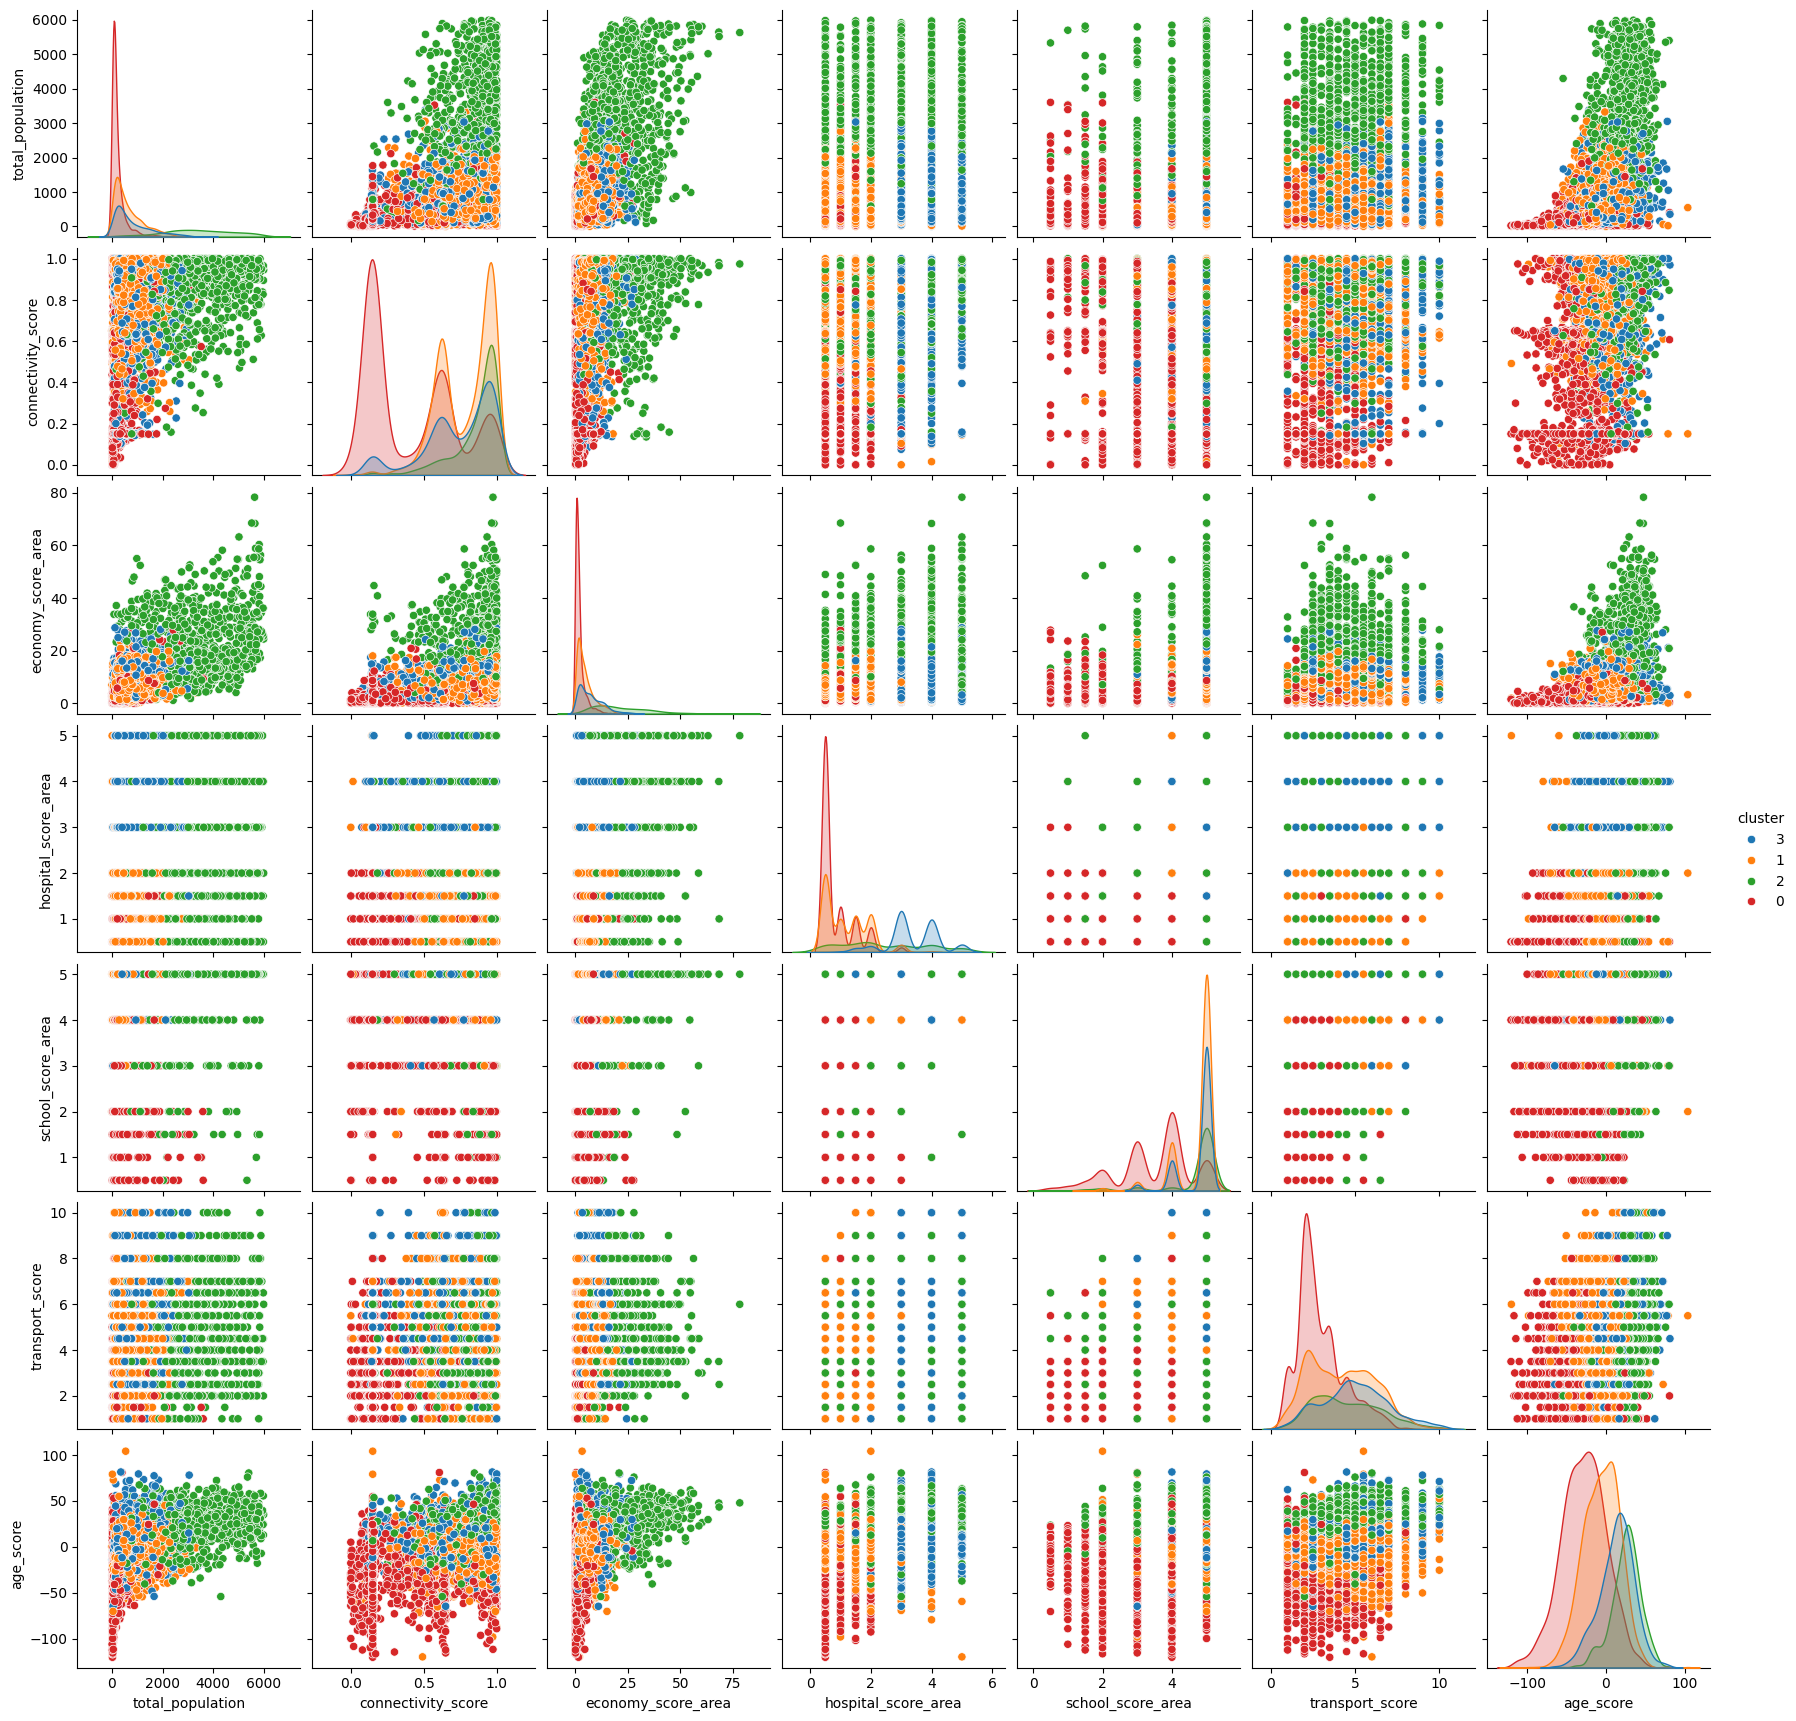

In [ ]:
sns.pairplot(df_pair, hue = "cluster")

In [ ]:
corr = df_pair.drop("cluster", axis=1).corr()

Text(0.5, 1.0, 'correlation matrix')

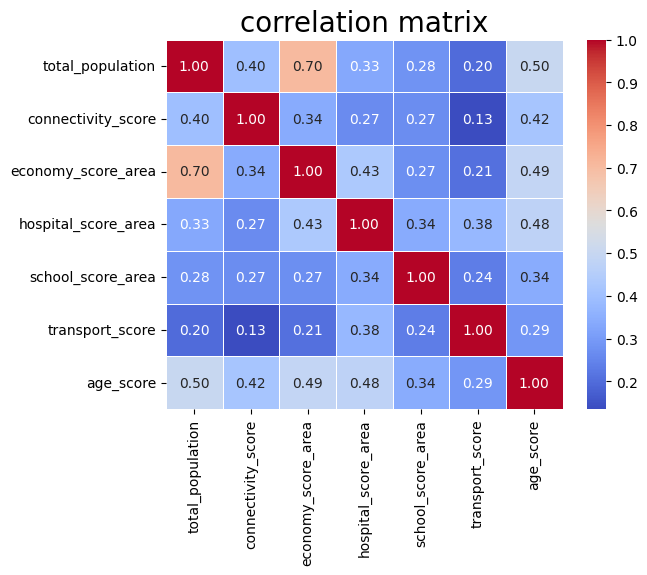

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("correlation matrix", fontsize = 20)

In [ ]:
corr_0 = df_pair_0.drop("cluster", axis=1).corr()

Text(0.5, 1.0, 'correlation matrix')

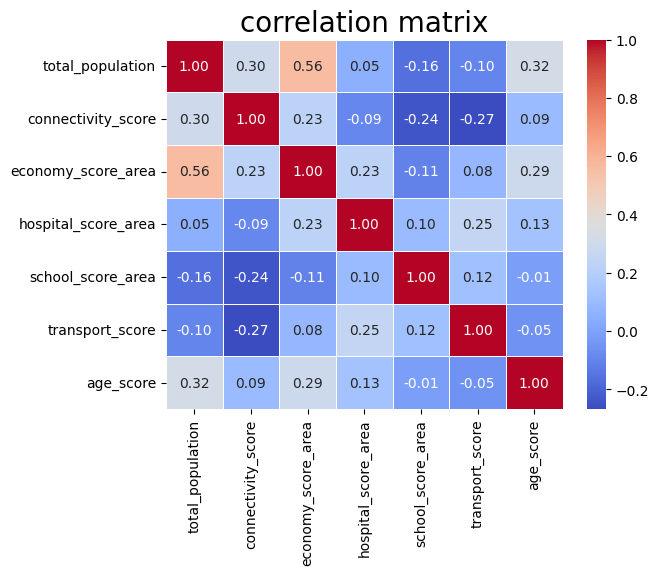

In [ ]:
sns.heatmap(corr_0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("correlation matrix Cluster 0", fontsize = 20)

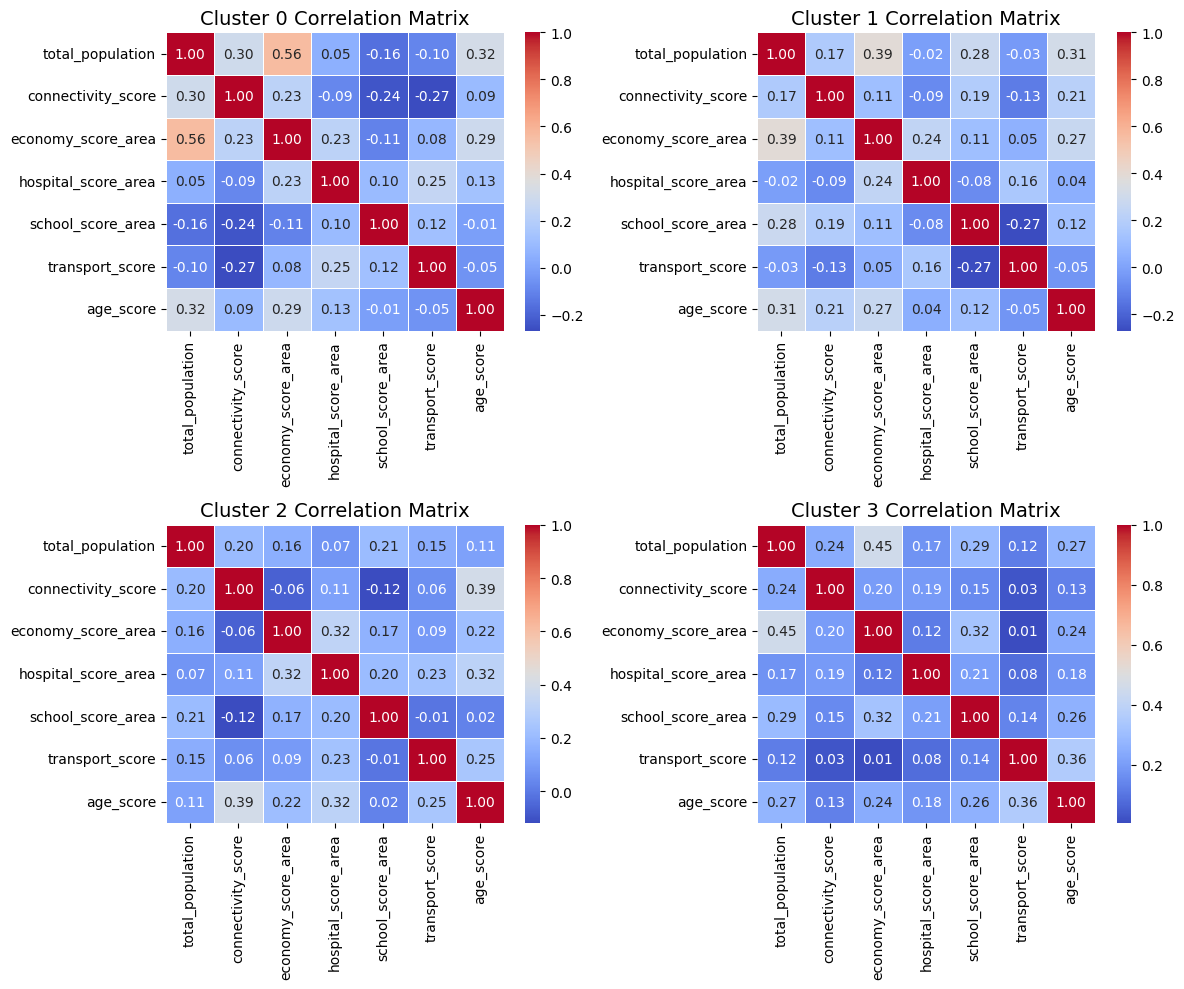

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_pair has a 'cluster' column and numeric data for correlation analysis
clusters = sorted(df_pair["cluster"].unique())  # Get unique cluster labels

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid
axes = axes.flatten()  # Flatten for easy iteration

for i, cluster in enumerate(clusters):
    df_cluster = df_pair[df_pair["cluster"] == str(cluster)].drop("cluster", axis=1)
    corr_matrix = df_cluster.corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                linewidths=0.5, ax=axes[i])  # Assign to subplot
    axes[i].set_title(f"Cluster {cluster} Correlation Matrix", fontsize=14)

plt.tight_layout()  # Adjust layout for clarity
plt.show()


In [ ]:
# Compute correlation matrices for each cluster
corr_matrices = {cluster: df_pair[df_pair["cluster"] == str(cluster)].drop("cluster", axis=1).corr()
                 for cluster in sorted(df_pair["cluster"].unique())}

# Compute average intra-cluster correlation for each feature
least_relevant_features = {}
for cluster, corr_matrix in corr_matrices.items():
    avg_corr = corr_matrix.mean(axis=1).abs()  # Compute average absolute correlation
    least_feature = avg_corr.idxmin()  # Find feature with lowest average correlation
    least_relevant_features[cluster] = (least_feature, avg_corr[least_feature])

# Print least relevant features per cluster
print("\n📉 Least Relevant Features in Each Cluster:")
for cluster, (feature, corr_value) in least_relevant_features.items():
    print(f"Cluster {cluster}: {feature} (Avg. Corr: {corr_value:.2f})")



📉 Least Relevant Features in Each Cluster:
Cluster 0: school_score_area (Avg. Corr: 0.10)
Cluster 1: transport_score (Avg. Corr: 0.11)
Cluster 2: school_score_area (Avg. Corr: 0.21)
Cluster 3: transport_score (Avg. Corr: 0.25)


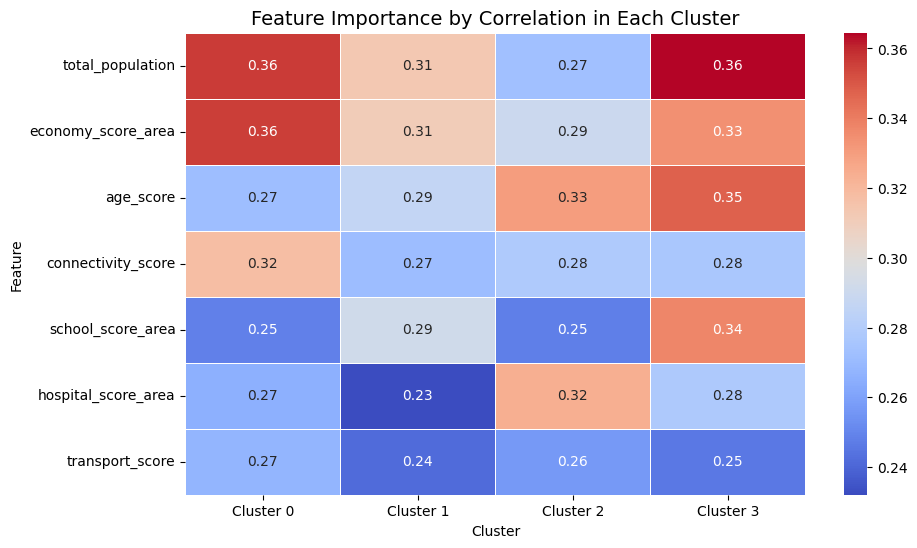

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Compute correlation matrices for each cluster
clusters = sorted(df_pair["cluster"].unique())  # Get unique cluster labels
corr_matrices = {cluster: df_pair[df_pair["cluster"] == str(cluster)].drop("cluster", axis=1).corr()
                 for cluster in clusters}

# Compute average absolute correlation for each feature in each cluster
feature_importance = pd.DataFrame()
for cluster, corr_matrix in corr_matrices.items():
    avg_corr = corr_matrix.abs().mean(axis=1)  # Compute average absolute correlation
    feature_importance[f"Cluster {cluster}"] = avg_corr

# Add overall importance (mean across clusters)
feature_importance["Overall Importance"] = feature_importance.mean(axis=1)

# Sort features by overall importance
feature_importance = feature_importance.sort_values(by="Overall Importance", ascending=False)

# 🔥 Plot Feature Importance Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_importance.drop(columns=["Overall Importance"]), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Importance by Correlation in Each Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()


C:\Users\Marina\AppData\Local\Temp\ipykernel_21688\240506234.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




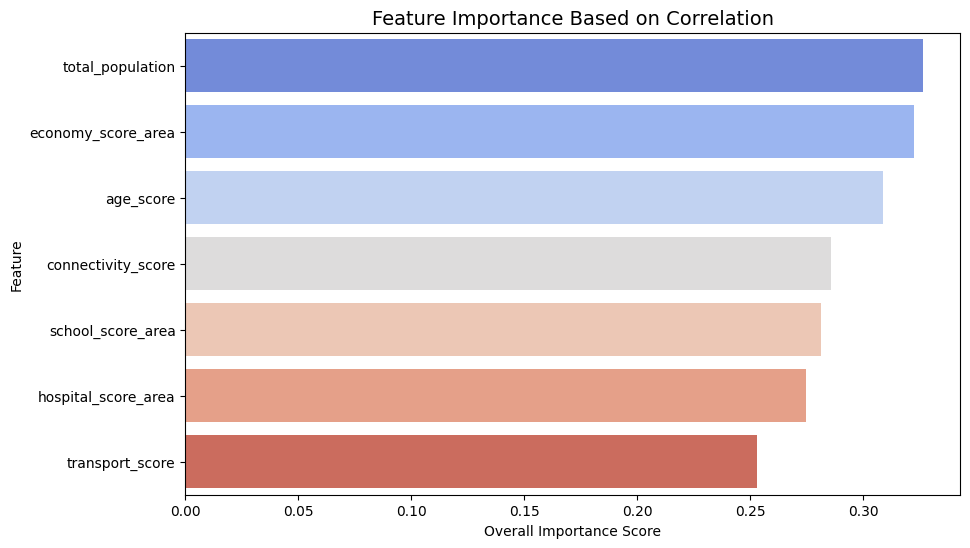

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrices for each cluster
clusters = sorted(df_pair["cluster"].unique())  # Get unique cluster labels
corr_matrices = {cluster: df_pair[df_pair["cluster"] == str(cluster)].drop("cluster", axis=1).corr()
                 for cluster in clusters}

# Compute average absolute correlation for each feature in each cluster
feature_importance = pd.DataFrame()
for cluster, corr_matrix in corr_matrices.items():
    avg_corr = corr_matrix.abs().mean(axis=1)  # Compute average absolute correlation
    feature_importance[f"Cluster {cluster}"] = avg_corr

# Add overall importance (mean across clusters)
feature_importance["Overall Importance"] = feature_importance.mean(axis=1)

# Sort features by overall importance (Most Important at the top)
feature_importance = feature_importance.sort_values(by="Overall Importance", ascending=False)

# 🔥 Visualization: Bar Plot of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_importance.index, x=feature_importance["Overall Importance"], palette="coolwarm")
plt.title("Feature Importance Based on Correlation", fontsize=14)
plt.xlabel("Overall Importance Score")
plt.ylabel("Feature")
plt.show()
